In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [2]:
# Loading the dataset
df = pd.read_csv('financial_sentiment_dataset.csv')
df.head()

,Sentiment,NewsHeadline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [3]:
df.shape

(4846, 2)

In [4]:
df.Sentiment.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [5]:
df.Sentiment.value_counts()

,count
Sentiment,
neutral,2879
positive,1363
negative,604


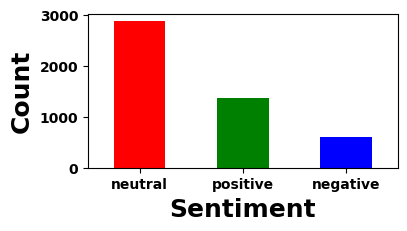

In [6]:
df.Sentiment.value_counts().plot(kind='bar', figsize=(4, 2), rot=0, color=['r', 'g', 'b'])
plt.xlabel('Sentiment', fontweight='bold', fontsize=18)
plt.ylabel('Count', fontweight='bold', fontsize=18)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold');

In [7]:
# Apply pre-processing
labelencoder = LabelEncoder()
df['Target'] = labelencoder.fit_transform(df['Sentiment'])

In [8]:
df.Target.unique()

array([1, 0, 2])

In [9]:
# Separate features and labels
X = df.NewsHeadline
y = df.Target

In [10]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(3876, 970, 3876, 970)

In [11]:
# Apply Vectorization and Multinomial Naive Bayes
clf = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB(force_alpha=False))
])

In [12]:
clf.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('mnb', MultinomialNB(force_alpha=False))])

In [13]:
print('Accuracy on the test set:', round(clf.score(X_test, y_test), 4))


Accuracy on the test set: 0.7557


In [14]:
# Plot confusion matrix
cat_labels = ['negative', 'neutral', 'positive']
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=cat_labels)

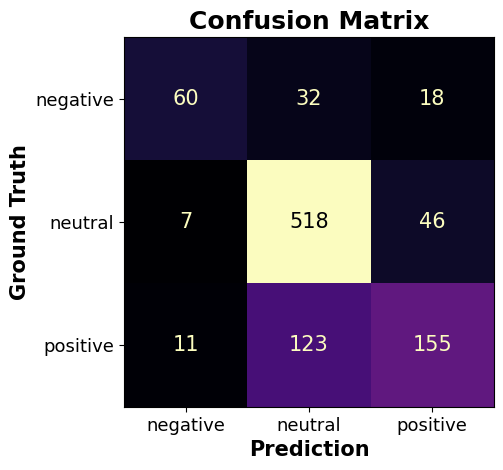

In [15]:
disp.plot(cmap='magma', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [16]:
print('F1 score:', round(metrics.f1_score(y_test, y_pred, average='micro'), 4))

F1 score: 0.7557


In [17]:
# Print classification report
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.55      0.64       110
           1       0.77      0.91      0.83       571
           2       0.71      0.54      0.61       289

    accuracy                           0.76       970
   macro avg       0.75      0.66      0.69       970
weighted avg       0.75      0.76      0.74       970



In [18]:
# Random Prediction
X_test[1538]

"In Finland , the corresponding service is Alma Media 's Etuovi.com , Finland 's most popular and best known nationwide online service for home and property sales ."

In [19]:
y_test[1538]

1

In [20]:
corpus = ["In France, the company pestka is the best breweries and it is located in bordeaux"]

In [21]:
clf.predict(corpus) # neutral


array([1])

In [22]:
clf.predict([X_test[1538]])


array([1])